**Using Neural Network to predict Iris Species**

This kernel uses multilayer perceptrons (Neural Network) to predict the species of the Iris dataset. Neural network is a machine learning algorithm which is inspired by a neuron.

Technically, a multilayer perceptron is being used as the architecture to prevent overfitting to the Iris Species due to less features available in the dataset.

In [1]:
#Import required libraries 

import keras # Library for neural network creation and training
import pandas as pd # Loading data in table form  
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O 
from sklearn.preprocessing import normalize # Machine learning algorithm library

2023-05-02 11:00:53.116031: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-02 11:00:53.160212: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:00:53.358365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-02 11:00:53.359167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 11:00:54.323007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
#Reading data 
data=pd.read_csv("./Iris.csv")
print("Describing the data: ",data.describe())
print()
print("Info of the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWid

In [3]:
print("10 first samples of the dataset:")
print(data.head(10))
print()
print("10 last samples of the dataset:")
print(data.tail(10))

10 first samples of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa

10 last samples of the dataset:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm   
140  141         

The code below converts the species into respective categories to be fed into the neural network by assigning them an index like 0,1 and 2. 

In [4]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [6]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
8      9            4.4           2.9            1.4           0.2       0
90    91            5.5           2.6            4.4           1.2       1
49    50            5.0           3.3            1.4           0.2       0
86    87            6.7           3.1            4.7           1.5       1
131  132            7.9           3.8            6.4           2.0       2


Now we convert the data to a numpy array so that the same can be processed by the machine learning libraries.

In [7]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[4.4 2.9 1.4 0.2]
 [5.5 2.6 4.4 1.2]
 [5.  3.3 1.4 0.2]]
Examples of y
 [0 1 0]


**Normalization**

It can be seen from above that the feature of the first dataset has the following average characterisitics:
- 6cm in Sepal Length
- 3.4cm in Sepal Width
- 4.5cm in Petal Length
- 1.6cm in Petal Width

  
However, the range of the dataset may be different for different features. Therefore, in order to maintain a good accuracy, the feature of each dataset must be normalized to a range of 0-1 for processing and evaluation. 

In [8]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.06087757 0.07676768 0.02754646 0.01150299]
 [0.07609697 0.06882619 0.0865746  0.06901797]
 [0.06917906 0.08735632 0.02754646 0.01150299]]


In [9]:
# Creating training, testing and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [10]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [11]:
# Change the label to one vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''

y_train = np_utils.to_categorical(y_train,num_classes=3)
y_test = np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [12]:
model=Sequential()

# We train the neural network with 5 hidden layers
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

# Make the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the model to 10 epochs
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 30ms/step - loss: 1.0860 - accuracy: 0.6083 - val_loss: 1.0567 - val_accuracy: 0.6000
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 1.0176 - accuracy: 0.6833 - val_loss: 0.9706 - val_accuracy: 0.6000
Epoch 3/10
6/6 [==============================] - 0s 7ms/step - loss: 0.8841 - accuracy: 0.6833 - val_loss: 0.8093 - val_accuracy: 0.6000
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.6917 - val_loss: 0.6177 - val_accuracy: 0.6000
Epoch 5/10
6/6 [==============================] - 0s 7ms/step - loss: 0.4967 - accuracy: 0.8167 - val_loss: 0.4534 - val_accuracy: 0.7667
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.3556 - accuracy: 0.9000 - val_loss: 0.3403 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2855 - accuracy: 0.9000 - val_loss: 0.3477 - val_accuracy: 0.8333
Epoch 8/10
6/6 [=================

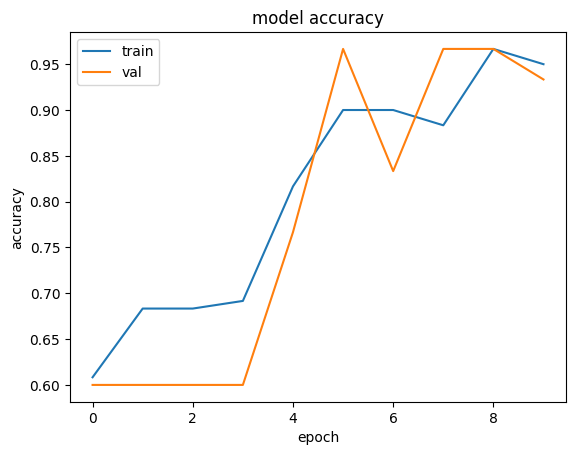

In [15]:
# Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

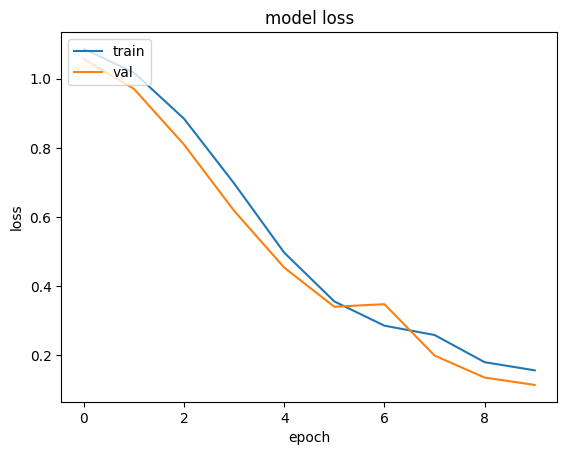

In [16]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
# Run the model on the testing data to determine the validity of the model 

prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 53ms/step
Accuracy of the dataset 93.33333333333333


An accuracy of **100%** is achieved in this dataset. It can be asserted that for each epoch, the neural network is trying to learn from its existing feature and predict it by its weights and biases. For each epoch, the weights and biases and changed by subtracting its rate to get a better accuracy each time.


**Further improvements:**

1. Adding batch normalization 
2. Adding dropout layer to prevent overfitting 